# Задача 5. Обучение без учителя

 - Найти данные с количеством признаков хотя бы 50, на которых можно решить задачу кластеризации.
 - Выполнить разведочный анализ (EDA). При необходимости выполнить полезные преобразования данных.
 - Самостоятельно реализуйте один из алгоритмов кластеризации, например K-means.
 - Обучите модели кластеризации, используя свою реализацию, а также хотя бы две реализации из sklearn (KMeans, Affinity Propogation, DBSCAN и тд).
 - При обучении использовать подбор гиперпараметров.
 - Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества.
 - (+3 балла) Также снизить размерность данных с помощью метода главных компонент PCA и и понять качество дальнейшей кластеризации всеми использованными реализациями при различном количестве главных компонент.
 - (+2 балла) Визуализировать данные снижением размерности до 2 или 3 с помощью PCA и t-SNE. В случае проблем с производительностью t-SNE, можно сначала до какой то степени снизить размерность с помощью PCA, а затем запустить t-SNE.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Датасет
Используемый [Датасет](https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist?select=TMNIST_Data.csv), который содержит черно-белые 28x28 пикселей изображения цифр в разных шрифтах, соответственно была поставлена цель выделить 10 классов.

In [2]:
df = pd.read_csv('font_digits.csv')

# 1.EDA

In [3]:
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Переименуем признаки

In [4]:
for i in df:
  df.rename(columns={i: "pixel"+ i}, inplace=True)

df.rename(columns={"pixelnames": "name"}, inplace=True)
df.rename(columns={"pixellabels": "label"}, inplace=True)

In [5]:
df.head()

,name,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.isnull().sum()

name        0
label       0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 786, dtype: int64

In [7]:
labels = df["label"]
labels.value_counts()

label
2    2990
8    2990
4    2990
3    2990
1    2990
6    2990
5    2990
9    2990
7    2990
0    2990
Name: count, dtype: int64

In [8]:
df.drop(columns=["label"], inplace=True)
df.drop(columns=["name"], inplace=True)

#2.PCA и t-SNE

In [9]:
%%time
from sklearn.decomposition import PCA
pca = PCA()

pca_res = pca.fit_transform(df)

CPU times: user 10.2 s, sys: 1.23 s, total: 11.4 s
Wall time: 8.11 s


<ipython-input-10-7d67042fae45>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('tab10', 10))


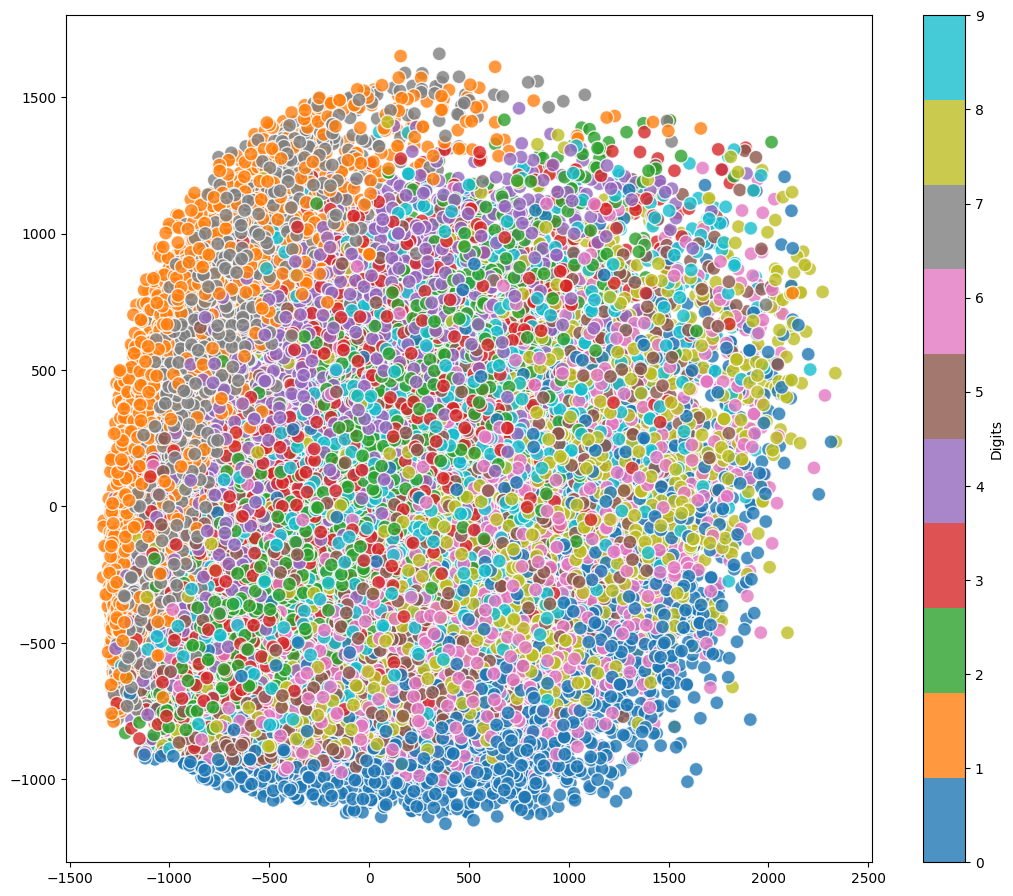

In [10]:
plt.figure(figsize=(13, 11))

plt.scatter(pca_res[:, 0], pca_res[:, 1], c=labels,
            edgecolor='white', alpha=0.8, s=100,
            cmap=plt.cm.get_cmap('tab10', 10))

plt.colorbar(label='Digits')

plt.show()

In [11]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE().fit_transform(df)

CPU times: user 11min 18s, sys: 2 s, total: 11min 20s
Wall time: 6min 53s


<ipython-input-12-667c24b62e7a>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('tab10', 10))


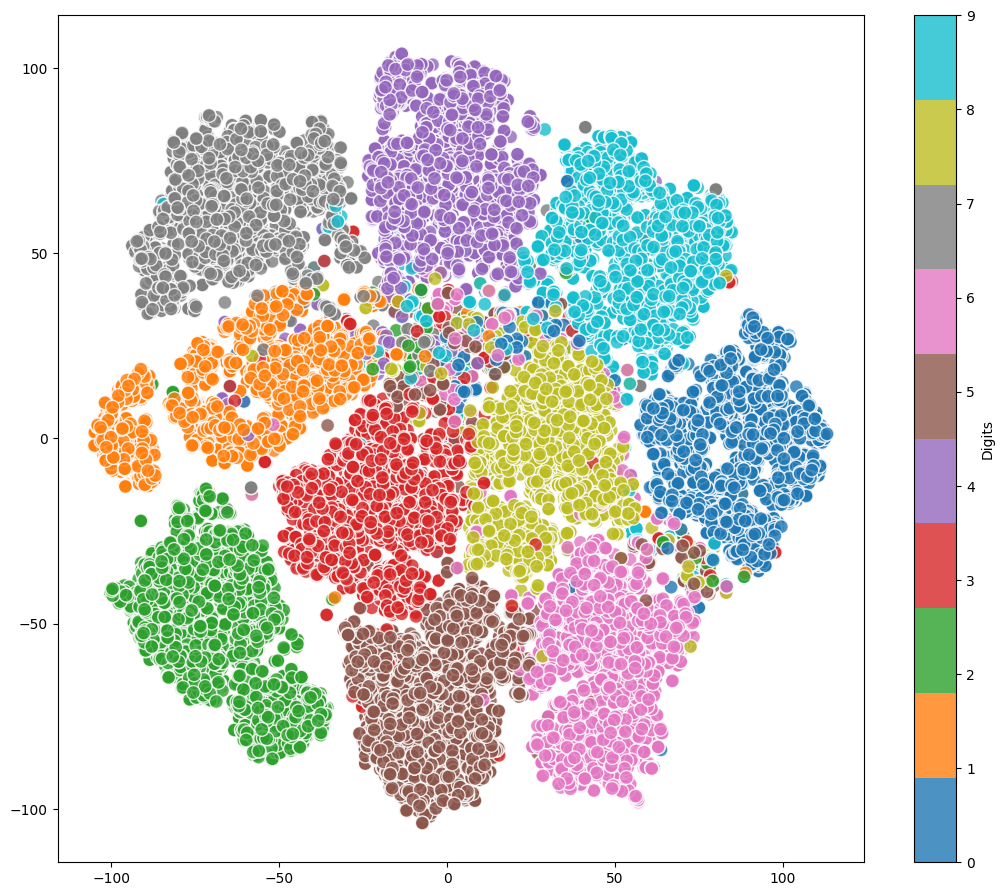

In [12]:
plt.figure(figsize=(13, 11))

plt.scatter(tsne[:, 0], tsne[:, 1], c=labels,
            edgecolor='white', alpha=0.8, s=100,
            cmap=plt.cm.get_cmap('tab10', 10))

plt.colorbar(label='Digits')

plt.show()

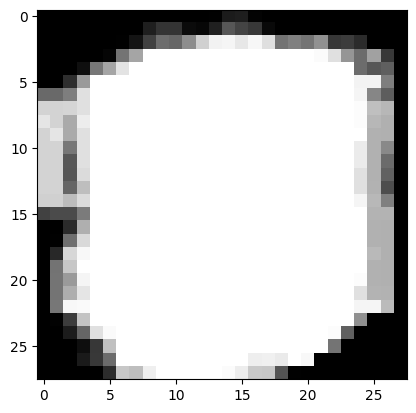

In [13]:
used = df.max().values
plt.imshow(used.reshape((28, 28)), cmap='gray');

Большая часть пикселей используется, теперь нужно выяснить сколько из них содержат значимую информацию.

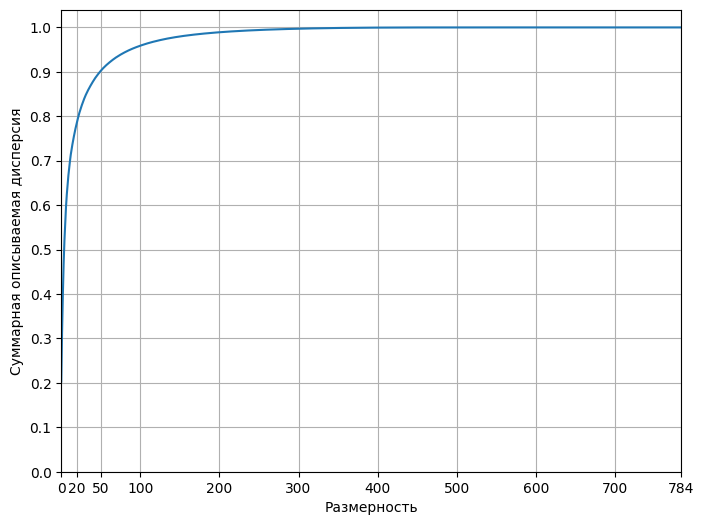

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Размерность")
plt.ylabel("Суммарная описываемая дисперсия")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks([*plt.xticks()[0], 20, 50, 28 * 28])
plt.xlim(0, 28 * 28)
plt.grid(True)

Можно заметить: при 20 уже можно описать 80 процентов дисперсии, при 50 - 90 процентов, а начиная с 200, увеличение размерности не несет значительного увеличения дисперсии.

#3.KMeans

In [15]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.utils import check_array, check_scalar, check_random_state
from sklearn.utils.validation import check_is_fitted
from sklearn.utils.estimator_checks import check_estimator

class MiniKMeans(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=10, *, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.tol = tol
        self.random_state = random_state

    def fit(self, x, y=None):
        self.n_clusters = check_scalar(self.n_clusters, "n_clusters", int, min_val=1)
        self.tol = check_scalar(self.tol, "tol", float, min_val=0)
        self.random_state_ = check_random_state(self.random_state)
        x = check_array(x)

        self.n_features_in_ = x.shape[1]
        self.cluster_centers_ = x[self.random_state_.choice(len(x), size=self.n_clusters, replace=False), :]
        max_center_shift = np.inf

        while max_center_shift > self.tol:
            self.labels_ = self._get_labels(x)
            new_centers = np.empty((self.n_clusters, self.n_features_in_))

            for label in np.unique(self.labels_):
                new_centers[label] = np.mean(x[self.labels_ == label], axis=0)

            max_center_shift = np.max(np.linalg.norm(self.cluster_centers_ - new_centers, axis=1))
            self.cluster_centers_ = new_centers

        return self


    def predict(self, x):
        check_is_fitted(self)
        return self._get_labels(check_array(x))


    def _get_labels(self, x):
        return np.argmin(np.linalg.norm(x[..., None] - self.cluster_centers_.T, axis=1), axis=1)

check_estimator(MiniKMeans())

Поскольку датасет размечен, будут использованы ARI, AMI, FMI метрики.

20 --- 80 %

50 --- 90 %

100 --- 96 %

20 --- 99 %

In [16]:
%%time
xs = [df, *(PCA(n_components=d).fit_transform(df) for d in [20, 50, 100, 200])]

CPU times: user 24.8 s, sys: 8.23 s, total: 33 s
Wall time: 19.2 s


In [49]:
import pathlib
import itertools
import time
from sklearn.base import clone
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score

RESULTS_PATH = pathlib.Path("results.csv")

def combs(grid):
    return

def train_and_save(estimator, params):
    combs = [dict(combinated_params) for combinated_params in itertools.product(*([(name, arg) for arg in args] for (name, args) in params.items()))]

    results = []
    for x in xs:
        best_ari = None
        best_ami = None
        best_fmi = None

        for comb in combs:
            e = clone(estimator).set_params(**comb)
            start_t = time.perf_counter()
            pred = e.fit_predict(x)
            fit_predict_time_s = (time.perf_counter() - start_t)
            ari = adjusted_rand_score(labels, pred)
            if best_ari is None or ari > best_ari[0]:
                best_ari = ari, fit_predict_time_s,comb
            ami = adjusted_mutual_info_score(labels, pred)
            if best_ami is None or ami > best_ami[0]:
                best_ami = ami, fit_predict_time_s,comb
            fmi = fowlkes_mallows_score(labels, pred)
            if best_fmi is None or fmi > best_fmi[0]:
                best_fmi = fmi, fit_predict_time_s, comb

        res = {
                "cluster": estimator.__class__.__name__,
                "dimension": x.shape[1],
                "mean fit predict time, s": np.mean([best_ari[1], best_ami[1], best_fmi[1]]),
                "ari": best_ari[0],
                "ami": best_ami[0],
                "fmi": best_fmi[0],
            }
        print(res)
        results.append(res)

    pd.DataFrame(results).to_csv(RESULTS_PATH, mode="a", header=not RESULTS_PATH.exists())

#Обучение

In [50]:
clusters_count=10

In [51]:
%%time
train_and_save(MiniKMeans(n_clusters=clusters_count, random_state=0), params={})

{'cluster': 'MiniKMeans', 'dimension': 784, 'mean fit predict time, s': 135.71915170100056, 'ari': 0.35256790824203865, 'ami': 0.5162845505924716, 'fmi': 0.42452288667926275}
{'cluster': 'MiniKMeans', 'dimension': 20, 'mean fit predict time, s': 4.757618716000252, 'ari': 0.3508374002526613, 'ami': 0.514946433451355, 'fmi': 0.42286923357728523}
{'cluster': 'MiniKMeans', 'dimension': 50, 'mean fit predict time, s': 13.145065747999979, 'ari': 0.3527297258358802, 'ami': 0.517013535756758, 'fmi': 0.4248018300515059}
{'cluster': 'MiniKMeans', 'dimension': 100, 'mean fit predict time, s': 16.966694095999628, 'ari': 0.35263848937804787, 'ami': 0.5161681281841825, 'fmi': 0.42458384024004575}
{'cluster': 'MiniKMeans', 'dimension': 200, 'mean fit predict time, s': 28.78797664100057, 'ari': 0.35258059051640234, 'ami': 0.5162867611833816, 'fmi': 0.4245349723584806}
CPU times: user 1min 43s, sys: 1min 31s, total: 3min 15s
Wall time: 3min 19s


In [52]:
%%time
from sklearn.cluster import KMeans

train_and_save(KMeans(n_clusters=clusters_count, n_init='auto', random_state=0), params={"algorithm": ["lloyd", "elkan"]})

{'cluster': 'KMeans', 'dimension': 784, 'mean fit predict time, s': 6.690570199999456, 'ari': 0.39738148433179626, 'ami': 0.5399826270476773, 'fmi': 0.462723591860759}
{'cluster': 'KMeans', 'dimension': 20, 'mean fit predict time, s': 0.24964860900036, 'ari': 0.3898130032697765, 'ami': 0.533075895447211, 'fmi': 0.45641474222058126}
{'cluster': 'KMeans', 'dimension': 50, 'mean fit predict time, s': 0.3320339829997465, 'ari': 0.39643367110688005, 'ami': 0.5391119915079865, 'fmi': 0.4618649267760831}
{'cluster': 'KMeans', 'dimension': 100, 'mean fit predict time, s': 1.4588816760006011, 'ari': 0.39027139762530283, 'ami': 0.5321668452996828, 'fmi': 0.4552966734492138}
{'cluster': 'KMeans', 'dimension': 200, 'mean fit predict time, s': 1.476646338000137, 'ari': 0.3975556501610198, 'ami': 0.5402061269118319, 'fmi': 0.4628928512245089}
CPU times: user 26.6 s, sys: 1.4 s, total: 28 s
Wall time: 17.4 s


In [53]:
%%time
from sklearn.cluster import DBSCAN

train_and_save(DBSCAN(n_jobs=4), params={"eps": [222, 444, 777], "min_samples": [22, 44, 77]})

{'cluster': 'DBSCAN', 'dimension': 784, 'mean fit predict time, s': 69.30055674899995, 'ari': 0.042778906708835863, 'ami': 0.24867188476483443, 'fmi': 0.3161801680352802}
{'cluster': 'DBSCAN', 'dimension': 20, 'mean fit predict time, s': 3.7620152826663493, 'ari': 0.04303642435418912, 'ami': 0.17880794356791416, 'fmi': 0.3161801680352802}
{'cluster': 'DBSCAN', 'dimension': 50, 'mean fit predict time, s': 5.183189561667253, 'ari': 0.020992012950110057, 'ami': 0.1778799733787252, 'fmi': 0.3161801680352802}
{'cluster': 'DBSCAN', 'dimension': 100, 'mean fit predict time, s': 6.553943578666804, 'ari': 0.04579126961956929, 'ami': 0.18236615235309964, 'fmi': 0.3161801680352802}
{'cluster': 'DBSCAN', 'dimension': 200, 'mean fit predict time, s': 12.910122400666902, 'ari': 0.05080952046729202, 'ami': 0.24015156476137123, 'fmi': 0.3161801680352802}
CPU times: user 22min 17s, sys: 1min 16s, total: 23min 33s
Wall time: 14min 43s


#Результаты

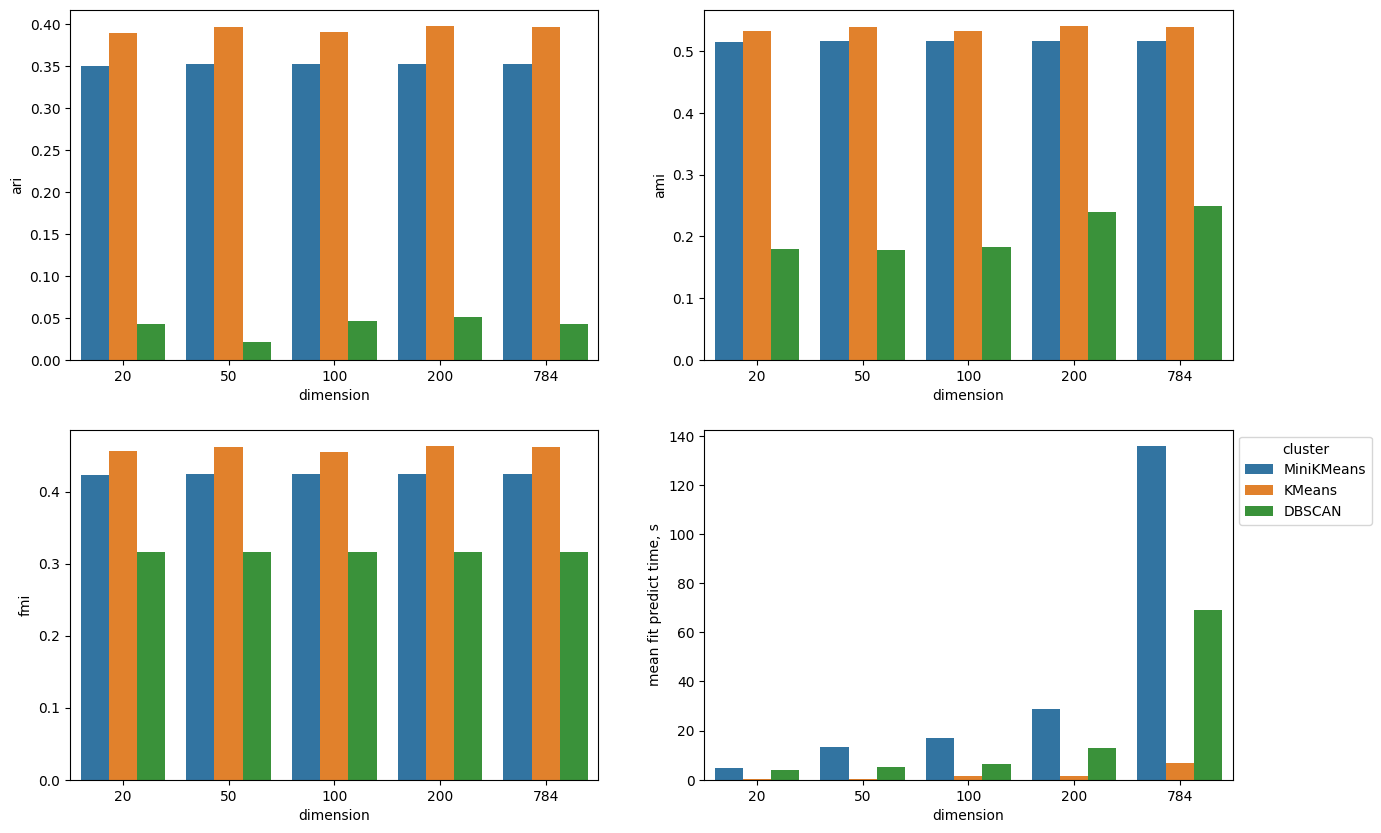

In [64]:
import seaborn as sns

results = pd.read_csv(RESULTS_PATH)
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))

for y, ax in zip(
    ["ari", "ami", "fmi", "mean fit predict time, s"], axs.flatten()
):
    sns.barplot(results, x="dimension", y=y, hue="cluster", ax=ax)
    if y == "mean fit predict time, s":
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    else:
        ax.get_legend().remove()

#Итог



1.   По скорости написанный алгоритм MiniKMeans уступает всем алгоритмам (вероятнее всего из-за отсутствия параллельного выполнения), а если сравнить библиотечные алгоритмы, то DBSCAN работает значительно медленее KMeans.
2.   По качеству же выигрывает KMeans, а написанный MiniKMeans уступает малую часть. Хуже всех же отрабатывает DBSCAN.

По данному анализу, можно сделать вывод: лучше всех справился библиотечный KMeans.

